In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
pd.__version__ #pandas version

'0.17.1'

# Establish Connection to DB through SSH

In [6]:
from sshtunnel import SSHTunnelForwarder
import MySQLdb as db
import pandas as pd
import sys
import logging
#logging.basicConfig(stream=sys.stdout, level=logging.DEBUG) 
import paramiko
#ssh = paramiko.SSHClient()
#ssh.set_missing_host_key_policy(paramiko.AutoAddPolicy())
#ssh.connect('ssicluster2.tk.informatik.tu-darmstadt.de',port = 12822, username='arun',password='ArunDss@123',allow_agent=False,look_for_keys=False)
localhost = '127.0.0.1'
user = 'root'
password='kUrsVbpyfFWF'
database = 'Energy_AD'
def query(q):
     with SSHTunnelForwarder(
          ('ssicluster2.tk.informatik.tu-darmstadt.de', 12822),
          allow_agent=False,
          ssh_username='arun',
          ssh_password = 'ArunDss@123',
          #remote_bind_address=('130.83.163.8', 3306)
          remote_bind_address=('127.0.0.1', 3306)
           
     ) as server:
          conn = db.connect(host=localhost,
          port=server.local_bind_port,
          user=user,
          passwd=password,
          db=database)

          return pd.read_sql_query(q, conn)

# Run the desired query 

In [10]:
#!/home/arun/anaconda2/bin/python
import MySQLdb as db1
import pandas as pd
import datetime
import pandas.io.sql as psql

now = datetime.datetime.now()
print "Start date and time using str method of datetime object:"
print str(now)

chunk_size = 518401
offset = 0
location = 'Torschlag_Trafo' + '%'
list_data = []
#Uncomment and run the below query to read all the data of particular location
#while True:
#    q = ("SELECT * FROM energy_sample_data1 where location like '%s' ORDER BY Serial_no LIMIT %s" % (location,chunk_size))
#    print(q)
#    list_data.append(query(q))
#    offset += chunk_size
#    if len(list_data[-1]) < chunk_size:
#        break
#print("Query executed")
# print("Concatenating....")
# dfs = pd.concat(list_data)

#To read only specific rows of data
q = ("SELECT * FROM energy_sample_data1 where location like '%s' ORDER BY Serial_no LIMIT %s" % (location,chunk_size))
print(q)
list_data.append(query(q))
dfs = pd.concat(list_data)



now1 = datetime.datetime.now()
print "End date and time using str method of datetime object:"
print str(now1)

print("Execution Completed")







Start date and time using str method of datetime object:
2016-12-22 11:18:23.989136
SELECT * FROM energy_sample_data1 where location like 'Torschlag_Trafo%' ORDER BY Serial_no LIMIT 518401
End date and time using str method of datetime object:
2016-12-22 11:22:35.497293
Execution Completed


In [11]:
dfs.shape

(518401, 16)

In [12]:
dfs.tail()

,Serial_no,Date,Time,V1,V2,V3,I1,I2,I3,I_N,Pges,Sges,CosPhi,Egy_trpt,Egy_con,Location
518396,63229357,2016-01-03,23:59:56,232.25,231.62,231.90,20.44,24.63,21.88,8.09,15137.20,15523.66,0.97,20356,14694156.80,Torschlag_Trafo_03012016.csv
518397,63229358,2016-01-03,23:59:57,232.25,231.62,231.90,20.44,24.63,21.88,8.09,15137.20,15523.66,0.97,20356,14694156.80,Torschlag_Trafo_03012016.csv
518398,63229359,2016-01-03,23:59:58,232.25,231.62,231.90,20.44,24.63,21.88,8.09,15137.20,15523.66,0.97,20356,14694156.80,Torschlag_Trafo_03012016.csv
518399,63229360,2016-01-03,23:59:59,232.25,231.62,231.90,20.44,24.63,21.88,8.09,15137.20,15523.66,0.97,20356,14694156.80,Torschlag_Trafo_03012016.csv
518400,63274031,2016-02-03,00:00:00,234.99,235.40,235.33,6.26,13.95,13.28,10.37,7609.34,7889.32,0.92,24188,31220528.64,Torschlag_Trafo_03022016.csv


# Read the saved CSV


In [ ]:
dfs = pd.read_csv('Torschlag_df.csv',sep=',')

In [ ]:
dfs.shape #DataFrame containing all fields of Siedlerstr_Trafo

In [ ]:
columns_list = dfs.columns

# Run the below code when data is read from SQL

In [13]:
cols = 'DESC energy_sample_data1 '
columns_list = query(cols)

In [14]:
cols_sql = pd.DataFrame(columns_list)
print("Columns names:")
print(cols_sql.iloc[:,0])

Columns names:
0     Serial_no
1          Date
2          Time
3            V1
4            V2
5            V3
6            I1
7            I2
8            I3
9           I_N
10         Pges
11         Sges
12       CosPhi
13     Egy_trpt
14      Egy_con
15     Location
Name: Field, dtype: object


In [15]:
#df_cols = cols_sql.iloc[:,0] # use this to read columns from sql
#columns_names= df_cols.tolist()

print("Columns names:")
print(dfs.columns.tolist())

Columns names:
['Serial_no', 'Date', 'Time', 'V1', 'V2', 'V3', 'I1', 'I2', 'I3', 'I_N', 'Pges', 'Sges', 'CosPhi', 'Egy_trpt', 'Egy_con', 'Location']


In [16]:
import gc
gc.collect()
#dfs.iloc[0:2500000][1:].corr()
#dfs.ix[0:2500000,'Serial_no':].corr()

323

In [17]:
dfs.corr()

,Serial_no,V1,V2,V3,I1,I2,I3,I_N,Pges,Sges,CosPhi,Egy_trpt,Egy_con
Serial_no,1.000000,-0.039790,-0.005592,-0.026317,0.055864,0.095806,0.117038,0.093894,0.091931,0.092922,-0.082033,-0.399772,-0.323157
V1,-0.039790,1.000000,0.989230,0.994610,-0.249485,-0.311914,-0.331771,-0.326405,-0.300196,-0.300263,0.184387,0.140612,-0.155394
V2,-0.005592,0.989230,1.000000,0.992374,-0.294798,-0.365359,-0.372163,-0.370454,-0.348111,-0.347836,0.176888,0.109067,-0.168809
V3,-0.026317,0.994610,0.992374,1.000000,-0.260959,-0.324328,-0.344508,-0.347641,-0.312844,-0.312771,0.181787,0.135821,-0.152048
I1,0.055864,-0.249485,-0.294798,-0.260959,1.000000,0.938989,0.948304,0.698044,0.974047,0.974465,0.275750,-0.187956,0.037284
I2,0.095806,-0.311914,-0.365359,-0.324328,0.938989,1.000000,0.967206,0.837937,0.987078,0.987179,0.108137,-0.191715,0.099331
I3,0.117038,-0.331771,-0.372163,-0.344508,0.948304,0.967206,1.000000,0.788320,0.988254,0.988599,0.150111,-0.233476,0.071170
I_N,0.093894,-0.326405,-0.370454,-0.347641,0.698044,0.837937,0.788320,1.000000,0.795402,0.794289,-0.185922,-0.263690,0.035851
Pges,0.091931,-0.300196,-0.348111,-0.312844,0.974047,0.987078,0.988254,0.795402,1.000000,0.999671,0.179722,-0.206348,0.073058
Sges,0.092922,-0.300263,-0.347836,-0.312771,0.974465,0.987179,0.988599,0.794289,0.999671,1.000000,0.172332,-0.206160,0.074873


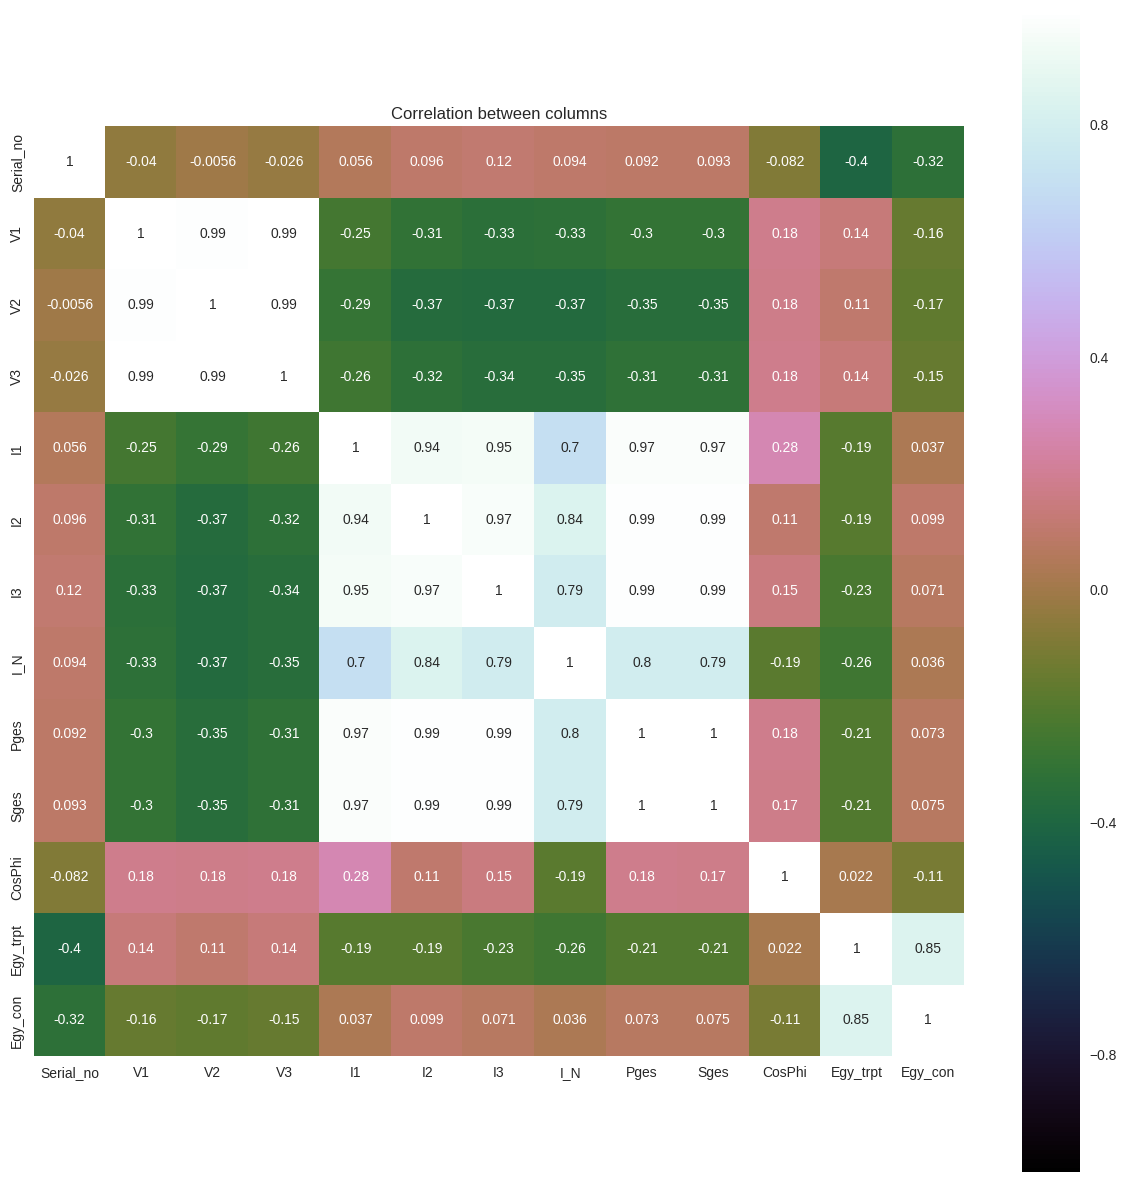

In [18]:
correlation = dfs.corr()
#plt.figure(figsize=(13,13))
fig = plt.figure(figsize=(15,15)) 
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Correlation between columns')

fig.savefig('Correlation_part1 Torschlag_Trafo_upto_518400.png')

# Statistics calculation implementation

# Plot statistics by grouping location 

In [39]:
dfs_loc = dfs.groupby('Location') # groupby location wise
#df_loc_part1 = dfs_drop_part1.groupby('Location') # groupby location wise

# Describe() : Produces the basic statistics of the DataFrame

In [24]:
dfs.drop(labels=['Time','Serial_no'],axis=1).describe()

,V1,V2,V3,I1,I2,I3,I_N,Pges,Sges,CosPhi,Egy_trpt,Egy_con
count,518401.000000,518401.000000,518401.000000,518401.000000,518401.000000,518401.000000,518401.000000,518401.000000,518401.000000,518401.000000,518401.000000,518401.000000
mean,234.507153,234.032915,233.978570,21.084788,34.527058,29.339678,16.117481,18906.444894,19838.807806,0.917736,18240.129930,17421544.260976
std,1.889983,1.870729,1.888219,22.270557,30.287287,27.620325,9.445288,17359.250788,18350.920265,0.034467,8335.405291,10531189.326607
min,228.380000,227.890000,228.020000,1.720000,3.530000,3.200000,4.710000,3719.890000,4766.180000,0.600000,0.000000,59775.000000
25%,233.140000,232.700000,232.650000,8.240000,15.580000,11.710000,9.210000,8635.930000,8980.310000,0.900000,20356.000000,14069358.080000
50%,234.480000,233.980000,233.930000,11.030000,19.620000,15.770000,12.700000,10339.460000,10779.800000,0.920000,20356.000000,14450528.000000
75%,235.840000,235.350000,235.300000,21.260000,40.140000,33.680000,20.620000,18600.780000,19309.280000,0.940000,24188.000000,30257825.280000
max,239.430000,238.850000,238.870000,150.970000,177.520000,155.680000,84.960000,105822.490000,111734.890000,1.010000,24188.000000,31220528.640000


# Saving the basic statistics to csv

In [25]:
dfs.drop(labels=['Time','Serial_no'],axis=1).describe().to_csv(r'Torschlag_Trafo_upto_518400_describe.csv',sep=',')

In [26]:
#dfs.iloc[0:500000][:].describe().to_csv(r'Torschlag_Trafo_corr_desc_1.csv',sep=',')

In [27]:
#dfs.iloc[500000:1000000][:].describe().to_csv(r'Torschlag_Trafo_corr_desc_2.csv',sep=',')

In [28]:
#dfs.iloc[1000000:1500000][:].describe().to_csv(r'Torschlag_Trafo_corr_desc_3.csv',sep=',')

In [29]:
#dfs.iloc[1500000:2000000][:].describe().to_csv(r'Torschlag_Trafo_corr_desc_4.csv',sep=',')

In [30]:
#dfs.iloc[2000000:2500000][:].describe().to_csv(r'Torschlag_Trafo_corr_desc_5.csv',sep=',')

In [31]:
#dfs.iloc[2500000:3000000][:].describe().to_csv(r'Torschlag_Trafo_corr_desc_6.csv',sep=',')

In [32]:
#dfs.iloc[3000000:3500000][:].describe().to_csv(r'Torschlag_Trafo_corr_desc_7.csv',sep=',')

In [33]:
#dfs.iloc[3500000:4000000][:].describe().to_csv(r'Torschlag_Trafo_corr_desc_8.csv',sep=',')

In [34]:
#dfs.iloc[4000000:4500000][:].describe().to_csv(r'Torschlag_Trafo_corr_desc_9.csv',sep=',')

In [35]:
#dfs.iloc[4500000:-1][:].describe().to_csv(r'Torschlag_Trafo_corr_last.csv',sep=',')

# Below you will calculate the correlation on the data grouped by location

In [36]:
#dfs_grp_loc = dfs.iloc[0:500000][:]

In [37]:
#dfs_grp_loc.groupby('Location').describe()

In [38]:
#dfs.iloc[500000:1000000][:].groupby('Location').describe()

In [40]:
dfs_loc.corr(method='pearson', min_periods=1)

CosPhi   Egy_con  Egy_trpt  \
Location                                                               
Torschlag_Trafo_01012016.csv CosPhi     1.000000  0.071309 -0.109686   
                             Egy_con    0.071309  1.000000  0.841682   
                             Egy_trpt  -0.109686  0.841682  1.000000   
                             I1         0.108106  0.187392  0.332185   
                             I2        -0.005667  0.046061 -0.043913   
                             I3         0.390638  0.360650  0.359620   
                             I_N       -0.595495 -0.032385  0.119077   
                             Pges       0.234226  0.270864  0.306699   
                             Serial_no  0.043184  0.997705  0.864918   
                             Sges       0.209508  0.271058  0.317304   
                             V1         0.205263  0.097568  0.053946   
                             V2         0.225098  0.010978 -0.027066   
                             V3         0.203216  0.061726  0.021240   
Torschlag_Trafo_01022016.csv CosPhi     1.000000 -0.307667       NaN   
                             Egy_con   -0.307667  1.000000       NaN   
                             Egy_trpt        NaN       NaN       NaN   
                             I1         0.547055  0.023803       NaN   
                             I2         0.404047  0.138491       NaN   
                             I3         0.432925  0.167022       NaN   
                             I_N        0.147602  0.245178       NaN   
                             Pges       0.471321  0.113579       NaN   
                             Serial_no -0.277313  0.979321       NaN   
                             Sges       0.461835  0.115247       NaN   
                             V1         0.057731  0.177857       NaN   
                             V2         0.028892  0.204823       NaN   
                             V3         0.052899  0.178776       NaN   
Torschlag_Trafo_02012016.csv CosPhi     1.000000 -0.413493       NaN   
                             Egy_con   -0.413493  1.000000       NaN   
                             Egy_trpt        NaN       NaN       NaN   
                             I1         0.085650  0.026005       NaN   
...                                          ...       ...       ...   
Torschlag_Trafo_02122015.csv Sges       0.684930  0.087244       NaN   
                             V1        -0.541026  0.130837       NaN   
                             V2        -0.564799  0.043206       NaN   
                             V3        -0.546239  0.091696       NaN   
Torschlag_Trafo_03012016.csv CosPhi     1.000000 -0.172722       NaN   
                             Egy_con   -0.172722  1.000000       NaN   
                             Egy_trpt        NaN       NaN       NaN   
                             I1         0.505938  0.321485       NaN   
                             I2        -0.356016  0.458060       NaN   
                             I3        -0.027678  0.554636       NaN   
                             I_N       -0.693469  0.262833       NaN   
                             Pges      -0.021282  0.566503       NaN   
                             Serial_no -0.222591  0.995096       NaN   
                             Sges      -0.039763  0.566521       NaN   
                             V1         0.300327  0.028027       NaN   
                             V2         0.361922 -0.052033       NaN   
                             V3         0.326498 -0.009383       NaN   
Torschlag_Trafo_03022016.csv CosPhi          NaN       NaN       NaN   
                             Egy_con         NaN       NaN       NaN   
                             Egy_trpt        NaN       NaN       NaN   
                             I1              NaN       NaN       NaN   
                             I2              NaN       NaN       NaN   
                             I3              NaN       NaN       NaN   
          

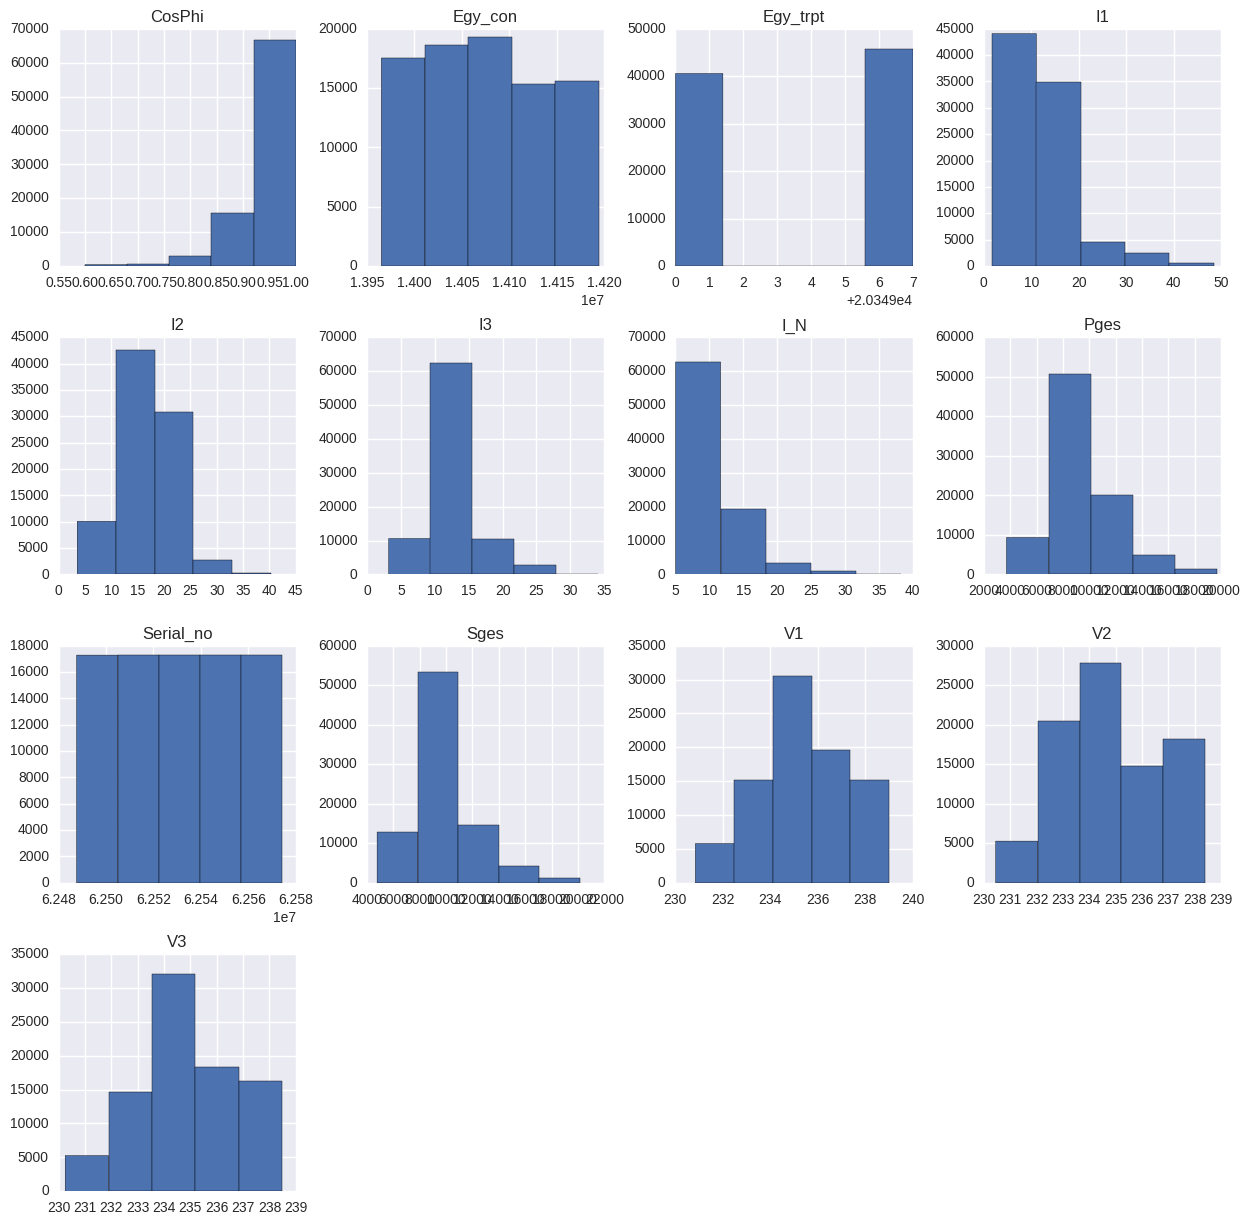

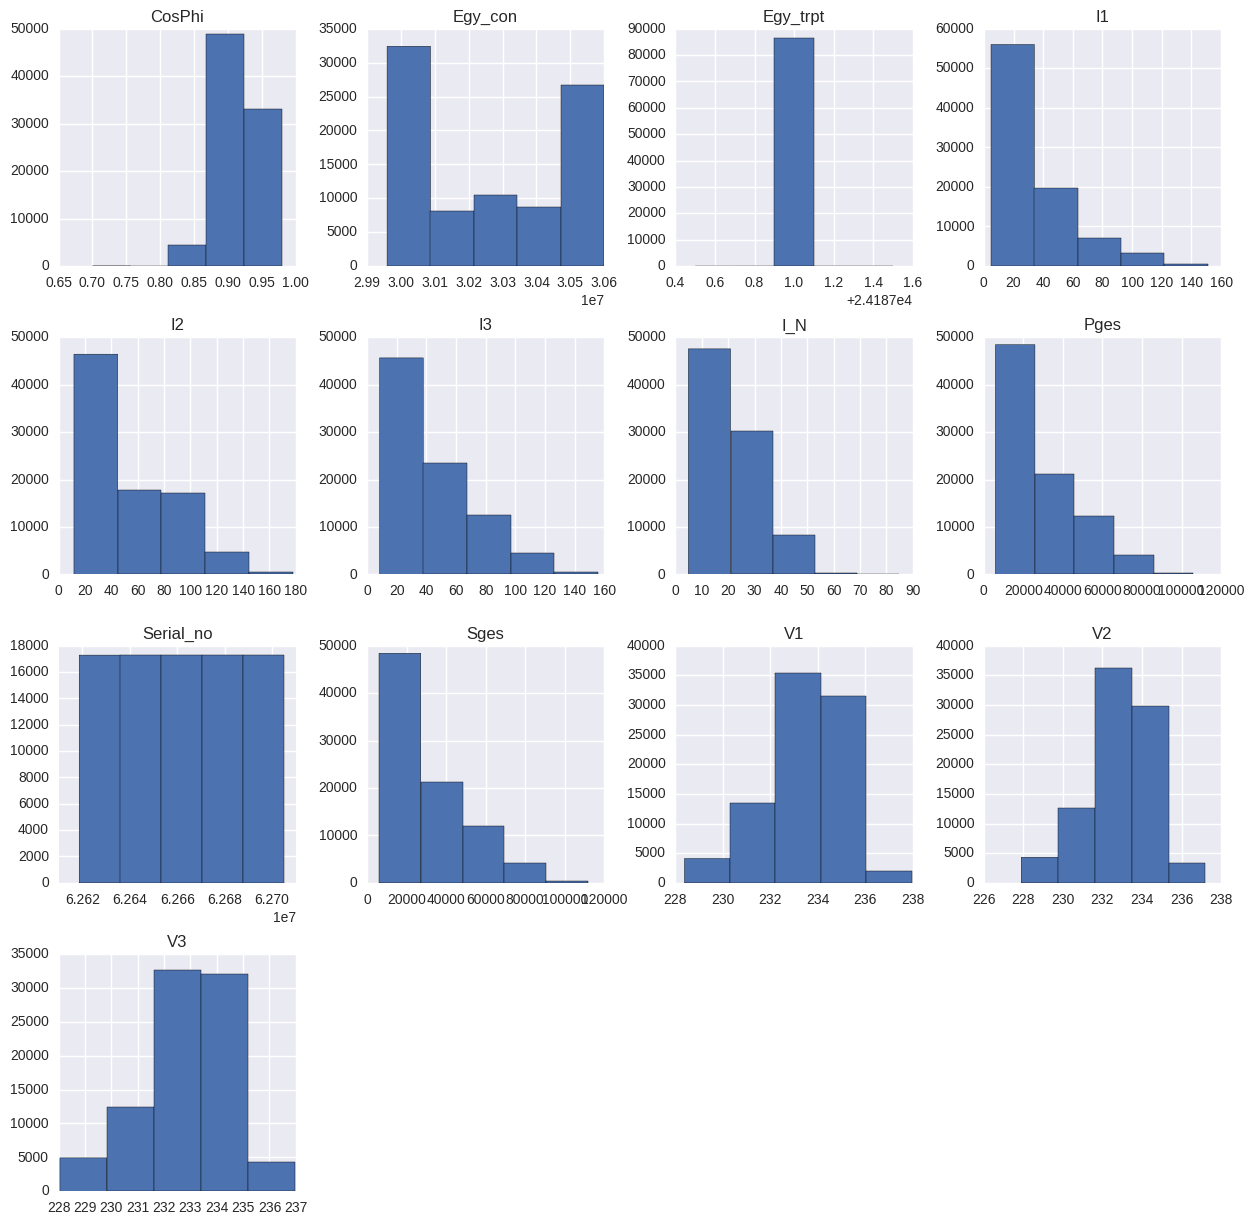

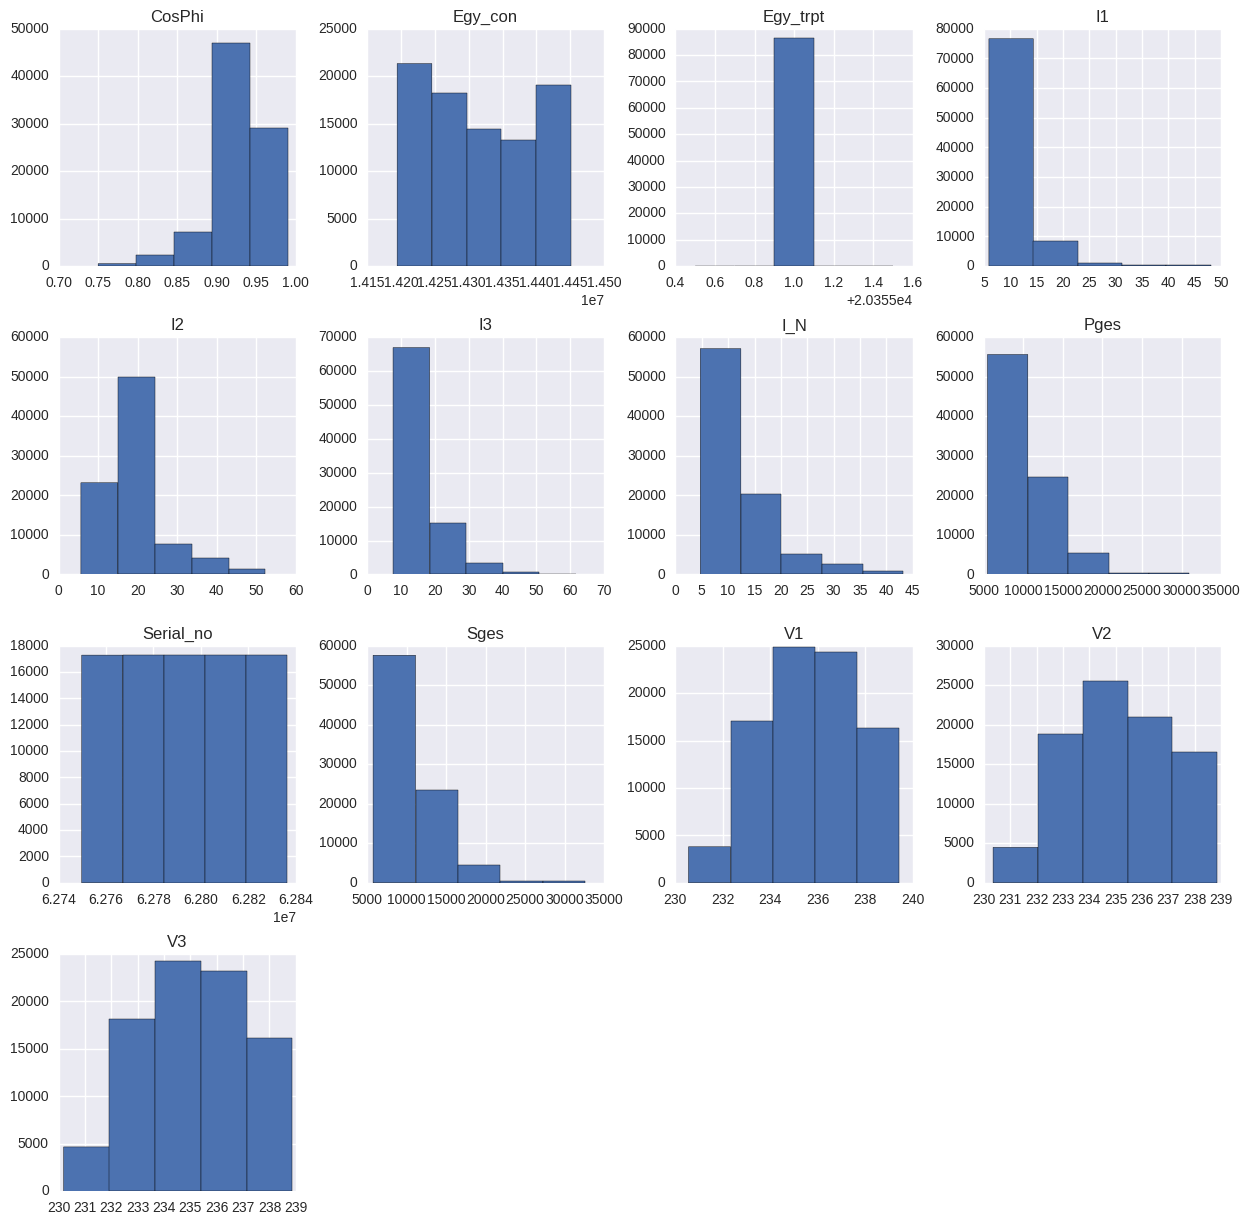

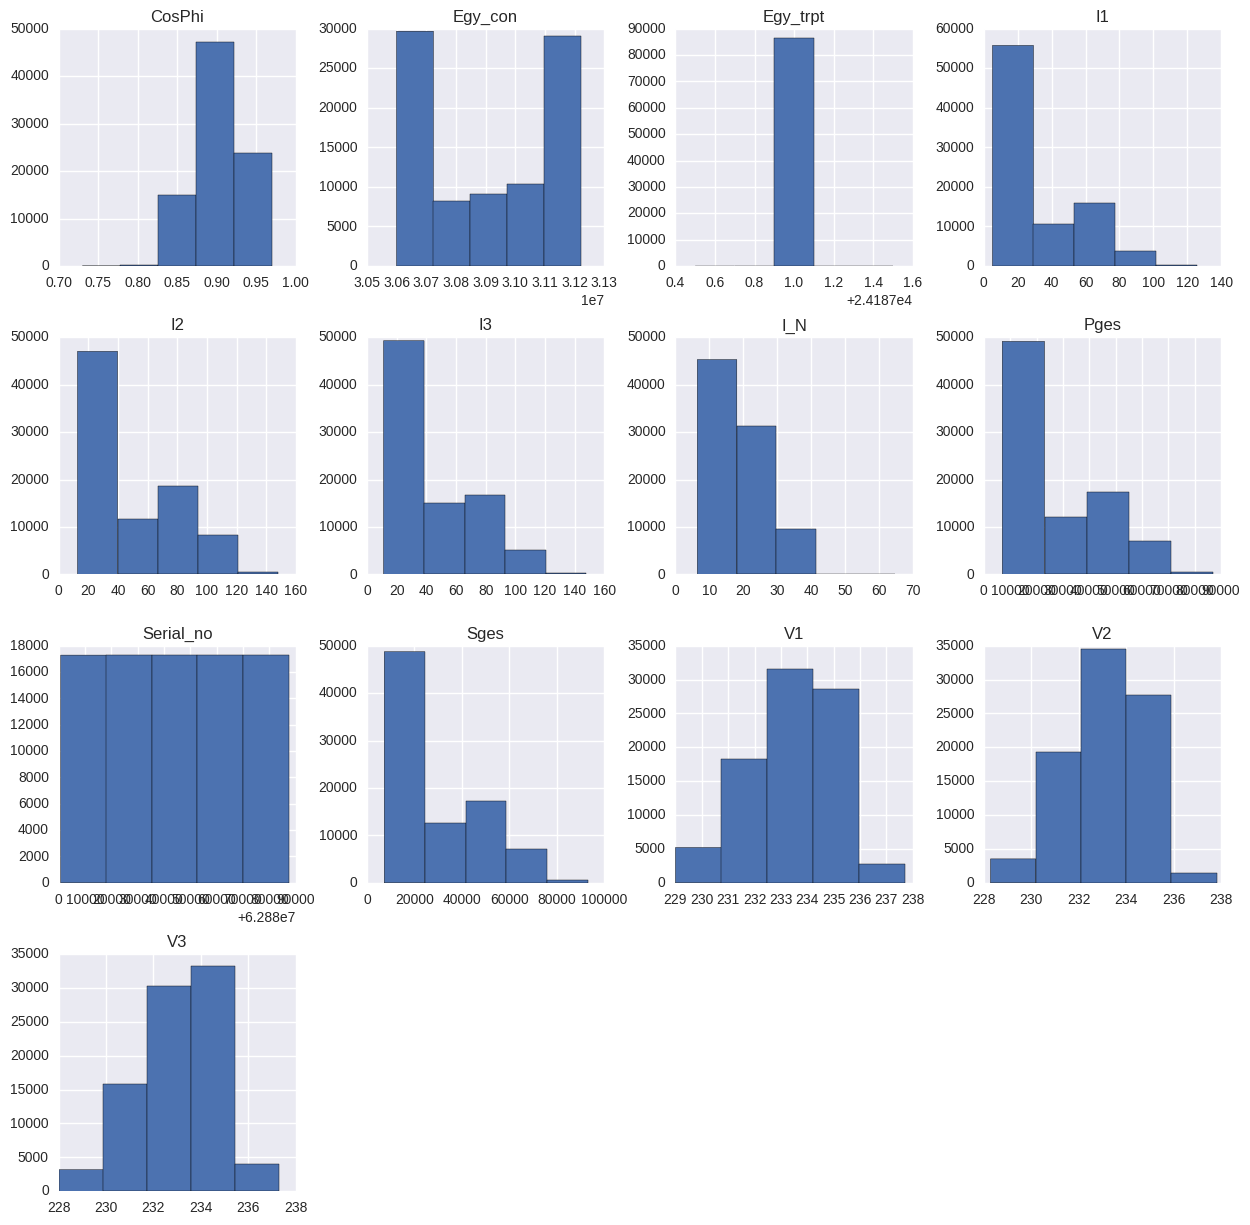

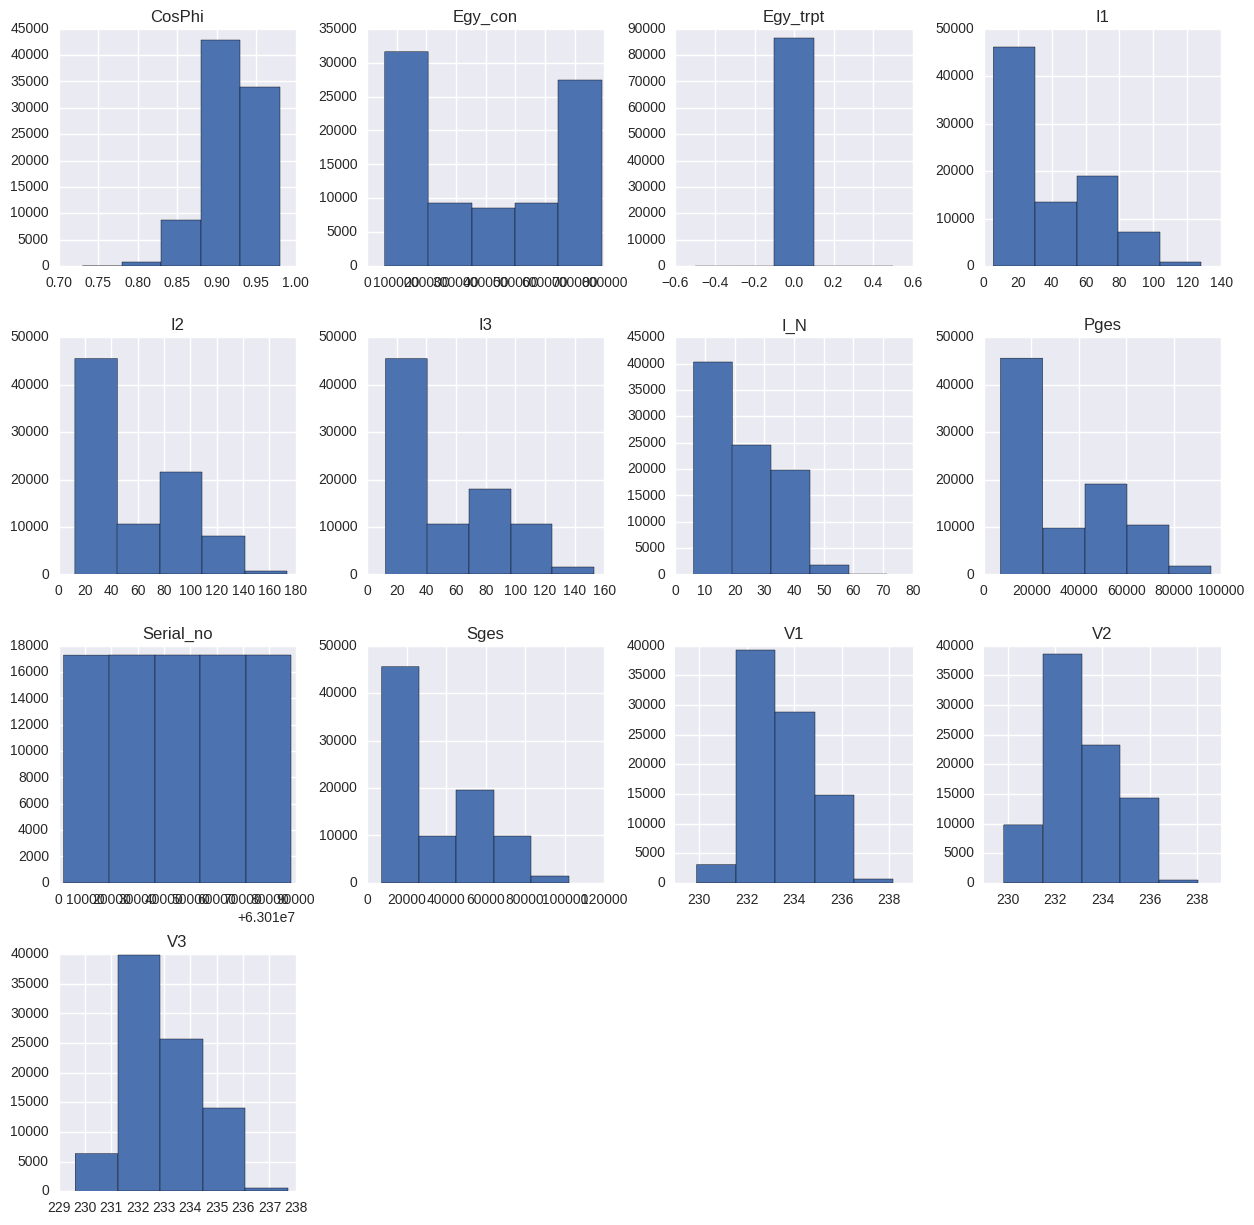

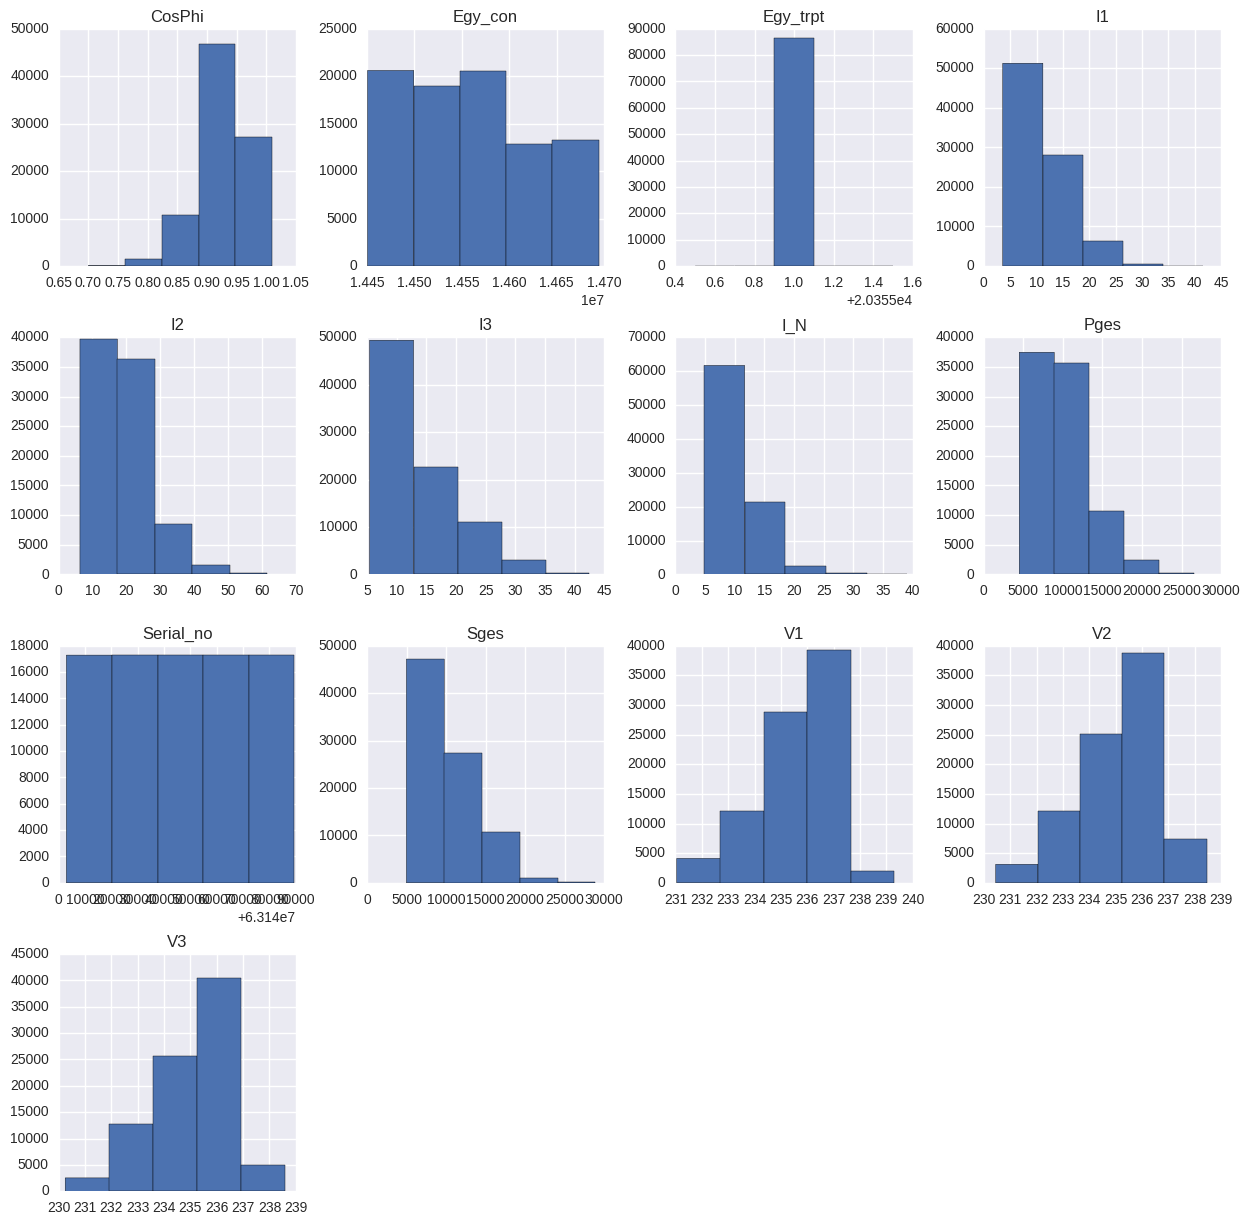

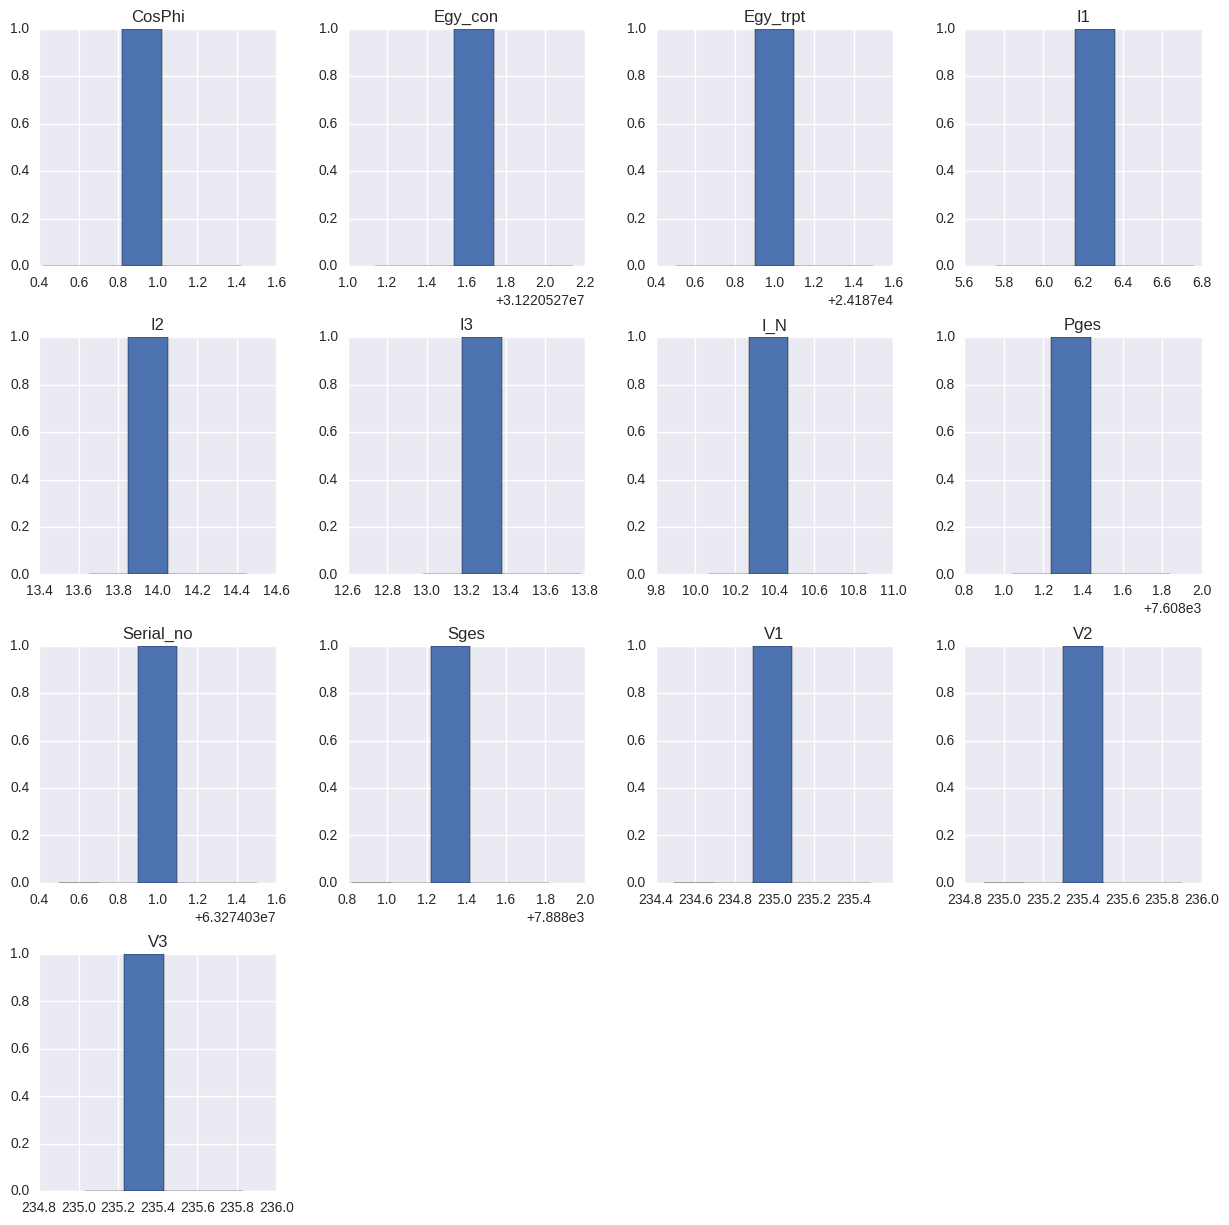

In [43]:
dfs_loc.hist(bins=5,figsize=(15,15))
plt.savefig('Torschlag_trafo_pearson_corr_groupby_location_upto_518400.png')
plt.show()


# Compute only the mean of the data grouped by location and visualize

In [44]:
df_st_mean = dfs_loc.mean()
df_st_mean

,Serial_no,V1,V2,V3,I1,I2,I3,I_N,Pges,Sges,CosPhi,Egy_trpt,Egy_con
Location,,,,,,,,,,,,,
Torschlag_Trafo_01012016.csv,62530810,235.435697,234.855414,234.878166,12.594245,16.922744,12.718153,10.537649,9557.613144,9926.253717,0.925525,20352.710741,14075534.503185
Torschlag_Trafo_01022016.csv,62661880,233.499871,232.898864,232.887729,29.105062,49.830769,41.259430,20.814243,26688.539450,28033.767163,0.913584,24188.000000,30258766.487288
Torschlag_Trafo_02012016.csv,62792950,235.635073,235.091820,235.069389,12.037836,19.460728,15.488199,12.191784,10673.090081,11043.219561,0.928404,20356.000000,14316218.087941
Torschlag_Trafo_02022016.csv,62924020,233.472779,233.171778,233.076691,27.428654,47.483782,42.425453,19.139099,25878.994357,27380.640851,0.903806,24188.000000,30910385.418162
Torschlag_Trafo_02122015.csv,63055090,233.469752,233.155895,232.973214,34.074783,54.115850,49.893541,23.690637,30486.308355,32097.900466,0.912476,0.000000,407838.010173
Torschlag_Trafo_03012016.csv,63186160,235.529740,235.023706,234.986218,11.268318,19.348717,14.253480,10.331540,10154.254731,10551.203383,0.922619,20356.000000,14560363.348637
Torschlag_Trafo_03022016.csv,63274031,234.990000,235.400000,235.330000,6.260000,13.950000,13.280000,10.370000,7609.340000,7889.320000,0.920000,24188.000000,31220528.640000


In [48]:
df_st_mean.to_csv(r'Torschlag_trafo_mean_groupby_location_upto_518400.csv',sep=',')

# Plot the groupby location 

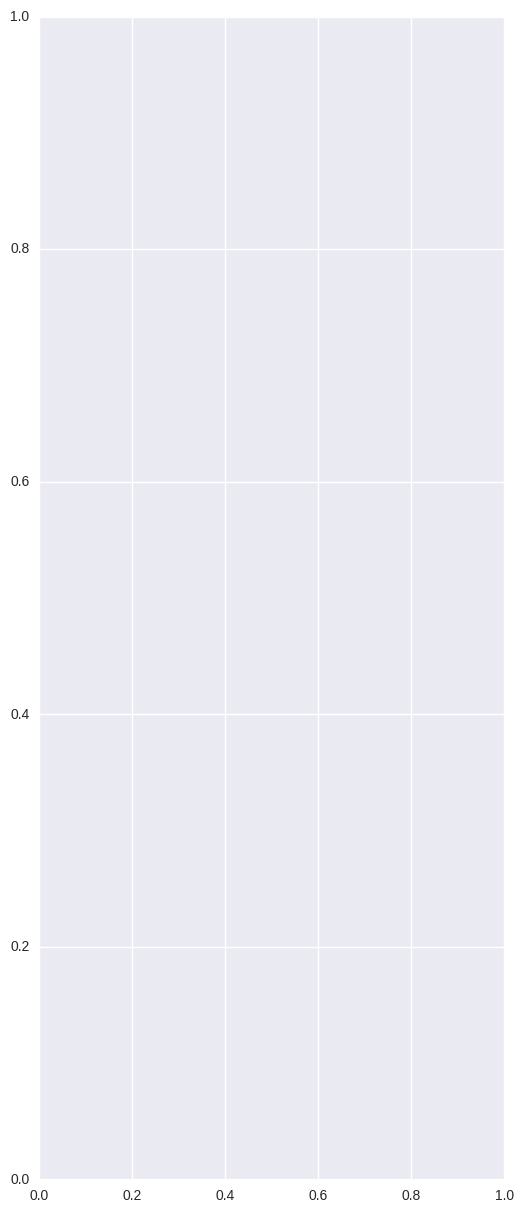

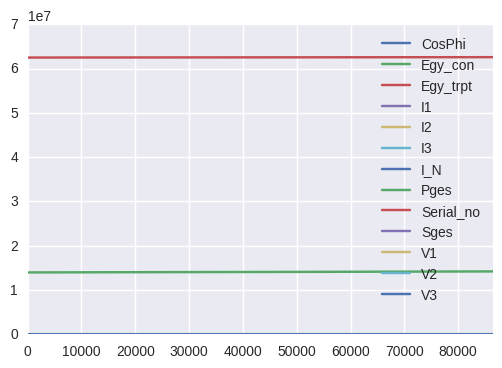

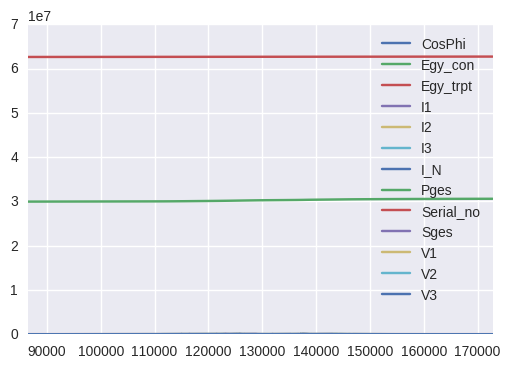

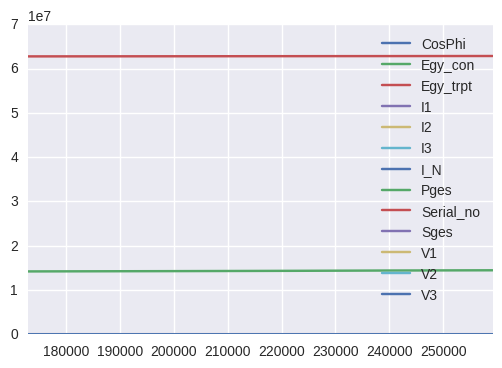

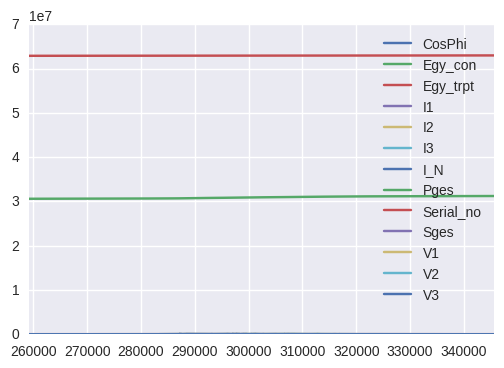

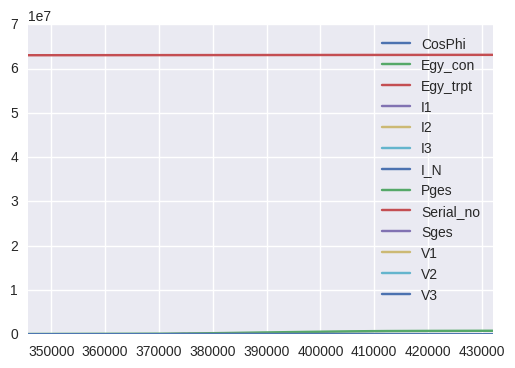

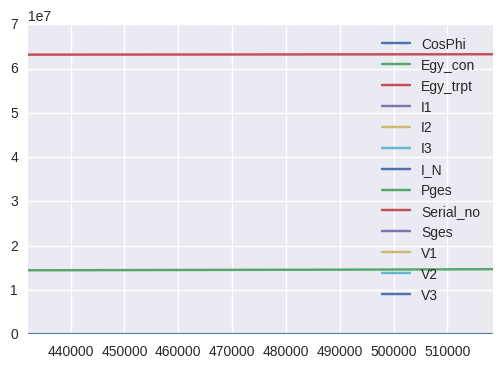

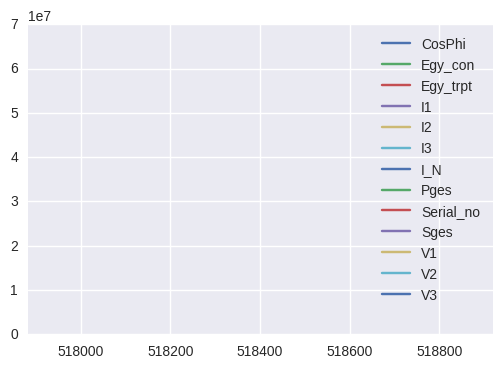

In [49]:
fig1,ax2 = plt.subplots(figsize=(6,15))
bp = dfs_loc.plot(kind='kde', ax2 = ax2, legend=False)


# PCA implementation

In [50]:
dfs_drop = dfs.drop(labels=['Serial_no', 'Date', 'Time','Location'],axis=1)

In [53]:
dfs_drop.columns

Index([u'V1', u'V2', u'V3', u'I1', u'I2', u'I3', u'I_N', u'Pges', u'Sges',
       u'CosPhi', u'Egy_trpt', u'Egy_con'],
      dtype='object')

In [54]:
X = dfs_drop.iloc[:,0:6].values
X

array([[ 237.41,  236.95,  236.8 ,   10.46,   21.15,   12.06],
       [ 237.41,  236.95,  236.8 ,   10.46,   21.15,   12.06],
       [ 237.41,  236.95,  236.8 ,   10.46,   21.15,   12.06],
       ..., 
       [ 232.25,  231.62,  231.9 ,   20.44,   24.63,   21.88],
       [ 232.25,  231.62,  231.9 ,   20.44,   24.63,   21.88],
       [ 234.99,  235.4 ,  235.33,    6.26,   13.95,   13.28]])

In [55]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [56]:
from sklearn.decomposition import PCA 
sklearn_pca = PCA(n_components=6)
Y_sklearn = sklearn_pca.fit_transform(X_std)

In [57]:
Y_sklearn.shape

(518401, 6)

In [58]:
n_components = pd.DataFrame(Y_sklearn, columns=('V1', 'V2', 'V3', 'I1', 'I2', 'I3'))
n_components.head()

,V1,V2,V3,I1,I2,I3
0,-2.531714,1.187613,-0.069141,0.084809,0.042743,-0.059493
1,-2.531714,1.187613,-0.069141,0.084809,0.042743,-0.059493
2,-2.531714,1.187613,-0.069141,0.084809,0.042743,-0.059493
3,-2.522498,1.170578,-0.070774,0.086998,0.043033,-0.059705
4,-2.522498,1.170578,-0.070774,0.086998,0.043033,-0.059705


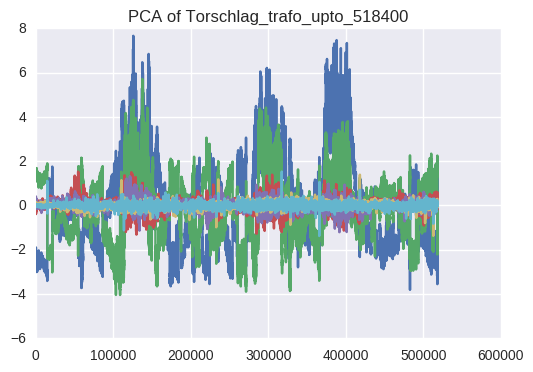

In [63]:
fig = plt.figure() 
plt.legend(loc='upper right')
plt.plot(n_components)
plt.title("PCA of Torschlag_trafo_upto_518400")

fig.savefig('PCA of Torschlag_trafo_upto_518400.png')
